**INSTAL LIBRARY**

In [22]:
# Install library yang dibutuhkan
!pip install tensorflow pandas scikit-learn

**IMPORT LIBRARY**

In [23]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical

**LOAD DATASET**

In [24]:
# Load dataset
url = 'https://raw.githubusercontent.com/gitagpds/dataset_fix/refs/heads/main/gym_and_diet_recommendation_cleaned_data.csv'
df = pd.read_csv(url)

# Tampilkan informasi dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14553 entries, 0 to 14552
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            14553 non-null  int64  
 1   Sex           14553 non-null  object 
 2   Age           14553 non-null  int64  
 3   Height        14553 non-null  float64
 4   Weight        14553 non-null  float64
 5   Hypertension  14553 non-null  object 
 6   Diabetes      14553 non-null  object 
 7   Exercises     14553 non-null  object 
 8   Diet          14553 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1023.4+ KB
None


In [25]:
print(df.head())

   ID   Sex  Age  Height  Weight Hypertension Diabetes  \
0   1  Male   18    1.68    47.5           No       No   
1   2  Male   18    1.68    47.5          Yes       No   
2   3  Male   18    1.68    47.5           No      Yes   
3   4  Male   18    1.68    47.5          Yes      Yes   
4   5  Male   18    1.68    47.5           No       No   

                                           Exercises  \
0  Squats, deadlifts, bench presses, and overhead...   
1  Squats, deadlifts, bench presses, and overhead...   
2  Squats, yoga, deadlifts, bench presses, and ov...   
3  Squats, yoga, deadlifts, bench presses, and ov...   
4  Squats, deadlifts, bench presses, and overhead...   

                                                Diet  
0  Vegetables: (Carrots, Sweet Potato, and Lettuc...  
1  Vegetables: (Tomatoes, Garlic, leafy greens, b...  
2  Vegetables: (Garlic, Roma Tomatoes, Capers and...  
3  Vegetables: (Garlic, Roma Tomatoes, Capers, Gr...  
4  Vegetables: (Carrots, Sweet Potato, 

**PREPROCESSING DATA**

In [26]:
# Encode kolom kategorikal 'Sex', 'Hypertension', 'Diabetes', and 'Exercises'
label_encoders = {}
for col in ['Sex', 'Hypertension', 'Diabetes', 'Exercises']: # Include 'Exercises' here
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the LabelEncoder for 'Exercises'

# Normalisasi kolom numerik
scaler = StandardScaler()
df[['Age', 'Height', 'Weight']] = scaler.fit_transform(df[['Age', 'Height', 'Weight']])

# Pisahkan fitur input dan output
X = df[['Sex', 'Age', 'Height', 'Weight', 'Hypertension', 'Diabetes']].values
y_exercises = to_categorical(df['Exercises'].values)

**SPLIT DATASET**

In [27]:
# Split dataset menjadi data latih dan uji untuk exercises saja
X_train, X_test, y_train_exercises, y_test_exercises = train_test_split(X, y_exercises, test_size=0.2, random_state=42)

**ONE-HOT ENCODING**

In [28]:
# One-hot encoding untuk Exercises (5 kelas)
# One-hot encoding untuk Diet (10 kelas)

y_train_exercises = to_categorical(y_train_exercises.argmax(axis=-1), num_classes=5)
y_test_exercises = to_categorical(y_test_exercises.argmax(axis=-1), num_classes=5)

In [29]:
print(f"y_train_exercises shape: {y_train_exercises.shape}")  # Harus (11642, 5)

y_train_exercises shape: (11642, 5)


**BUILD MODEL**

In [30]:
# Input layer
input_layer = Input(shape=(X_train.shape[1],))

# Hidden layer
hidden_layer = Dense(64, activation='relu')(input_layer)
hidden_layer = Dense(32, activation='relu')(hidden_layer)

# Output layer untuk Exercises (5 kelas)
exercises_output = Dense(5, activation='softmax', name='exercises_output')(hidden_layer)

# Model dengan dua output
model = Model(inputs=input_layer, outputs=[exercises_output])

# Compile model
model.compile(optimizer='adam',
              loss={'exercises_output': 'categorical_crossentropy'},
              metrics={'exercises_output': 'accuracy'})

# Tampilkan ringkasan model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ exercises_output (Dense)             │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,693 (10.52 KB)

 Trainable params: 2,693 (10.52 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train_exercises shape: {y_train_exercises.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test_exercises shape: {y_test_exercises.shape}")

X_train shape: (11642, 6)
y_train_exercises shape: (11642, 5)
X_test shape: (2911, 6)
y_test_exercises shape: (2911, 5)


In [33]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(y_train_exercises)))

False
False


**TRAINING MODEL**

In [34]:
model.compile(
    optimizer='adam',
    loss={
        'exercises_output': 'categorical_crossentropy'
    },
    metrics={
        'exercises_output': 'accuracy'
    }
)

In [35]:
# Train model
history = model.fit(
    X_train,
    {'exercises_output': y_train_exercises},
    validation_data=(
        X_test,
        {'exercises_output': y_test_exercises}
    ),
    epochs=50,
    batch_size=32
)

Epoch 1/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7815 - loss: 0.8035 - val_accuracy: 0.9938 - val_loss: 0.0500
Epoch 2/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9961 - loss: 0.0379 - val_accuracy: 0.9955 - val_loss: 0.0227
Epoch 3/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9947 - loss: 0.0210 - val_accuracy: 0.9955 - val_loss: 0.0193
Epoch 4/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9974 - loss: 0.0136 - val_accuracy: 0.9948 - val_loss: 0.0194
Epoch 5/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9957 - loss: 0.0150 - val_accuracy: 0.9952 - val_loss: 0.0162
Epoch 6/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9944 - loss: 0.0145 - val_accuracy: 0.9945 - val_loss: 0.0168
Epoch 7/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9958 - loss: 0.0124 - val_accuracy: 0.9955 - val_loss: 0.0163
Epoch 8/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9952 - loss: 0.0139 - val_accuracy: 0.

In [36]:
# Evaluasi model
loss, exercises_accuracy = model.evaluate(X_test,
                                                         {'exercises_output': y_test_exercises}) # Using y_test_exercises instead of y_test['Exercises']

print(f'Loss: {loss}')
print(f'Exercises Accuracy: {exercises_accuracy}')

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9935 - loss: 0.0171
Loss: 0.017597801983356476
Exercises Accuracy: 0.9927859902381897


In [37]:
# Menyimpan model dalam format .h5
model.save('exercises_model.h5')

In [39]:
# Mengonversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TFLite
with open('exercises_model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp3w8ucu37'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 6), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  136906246077104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136902322693120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136902035613200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136901347529072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136901347526432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136901347525552: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [40]:
# Mengunduh model TFLite
from google.colab import files
files.download('exercises_model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

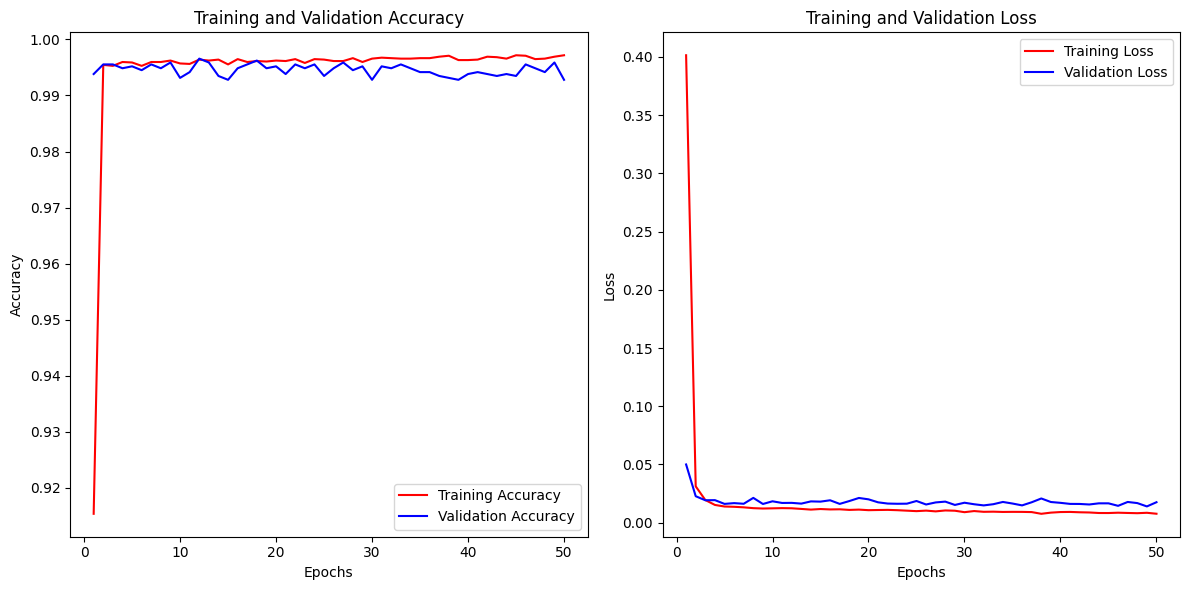

In [41]:
import matplotlib.pyplot as plt

# Ambil data dari history
# Check if the keys are prefixed with output name
if 'exercises_output_accuracy' in history.history:
    train_acc_key = 'exercises_output_accuracy'
    val_acc_key = 'val_exercises_output_accuracy'
    train_loss_key = 'exercises_output_loss'
    val_loss_key = 'val_exercises_output_loss'
else:  # If not, assume they are not prefixed
    train_acc_key = 'accuracy'
    val_acc_key = 'val_accuracy'
    train_loss_key = 'loss'
    val_loss_key = 'val_loss'

epochs = range(1, len(history.history[train_acc_key]) + 1)
train_acc = history.history[train_acc_key]  # Training Accuracy
val_acc = history.history[val_acc_key]  # Validation Accuracy
train_loss = history.history[train_loss_key]  # Training Loss
val_loss = history.history[val_loss_key]  # Validation Loss

# Buat plot
plt.figure(figsize=(12, 6))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'r-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Subplot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'r-', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()